In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))   # 添加 qec_sim 到搜索路径
from shor_code.shor9_bitflip import Shor9BitFlipCode
import numpy as np
import random

# Shor(9,1,3) 码：比特翻转错误模型

本 Notebook 展示量子 Shor 码的 **经典等价比特翻转（X 错误）模型**。

我们从“编码 – 加错 – 解码”的角度理解 Shor 码的核心思想：

- **第一层：相位编码**（忽略）
- **第二层：比特翻转纠错（重复码）**
- **第三层：相位纠错（重复码）**

为了简化，本 Notebook 实现了 Shor 码的“比特翻转（X 错误）模型”：

> 将 Shor(9,1,3) 看作：  
> **外层三比特重复码** + **内层三个三比特重复码**

结构如下：
逻辑比特 → 外层重复码 → 3 个块比特
每个块比特 → 内层重复码 → 各自扩展为 3 个物理比特
总计 9 个物理比特


这仍然能展示 Shor 码的核心：

✔ 抵抗单比特 X 错误  
✔ 抵抗少量多比特错误  
✔ 体现量子纠错的“分层纠错思想”

In [ ]:
code = Shor9BitFlipCode()
print("Shor (9,1,3) bit-flip 模型已加载。")

Shor (9,1,3) bit-flip 模型已加载。


In [3]:
m = 1                               # 逻辑比特
codeword = code.encode_logical_bit(m)

error_positions = [2]               # 施加一个 X 错误
received = code.add_bitflip_errors(codeword, error_positions)

m_hat, block_bits, infos = code.decode(received)

print("逻辑比特 =", m)
print("编码码字 =", codeword)
print("注入错误 =", error_positions)
print("接收向量 =", received)
print("块解码 =", block_bits)
print("输出逻辑比特 =", m_hat)
print("是否纠正成功 =", (m == m_hat))


逻辑比特 = 1
编码码字 = [1, 1, 1, 1, 1, 1, 1, 1, 1]
注入错误 = [2]
接收向量 = [1, 1, 0, 1, 1, 1, 1, 1, 1]
块解码 = [1, 1, 1]
输出逻辑比特 = 1
是否纠正成功 = True


In [4]:
import random

for i in range(5):
    m = random.randint(0,1)
    pos = random.randint(0,8)

    codeword = code.encode_logical_bit(m)
    received = code.add_bitflip_errors(codeword, [pos])
    m_hat, _, _ = code.decode(received)

    print(f"实验{i+1}: m={m}, 错误位置={pos}, 解码={m_hat}, 是否成功={m==m_hat}")


实验1: m=1, 错误位置=1, 解码=1, 是否成功=True
实验2: m=0, 错误位置=6, 解码=0, 是否成功=True
实验3: m=1, 错误位置=6, 解码=1, 是否成功=True
实验4: m=0, 错误位置=5, 解码=0, 是否成功=True
实验5: m=1, 错误位置=7, 解码=1, 是否成功=True


In [5]:
tests = [
    [2],          # 单错误
    [1,4],        # 两错误（不同块）
    [0,1],        # 同一块中两错误（多数表决失败）
]

m = 1
for err in tests:
    c = code.encode_logical_bit(m)
    r = code.add_bitflip_errors(c, err)
    m_hat, _, _ = code.decode(r)
    print(f"错误位置 {err} → 解码结果 {m_hat}, 纠正成功：{m_hat==m}")


错误位置 [2] → 解码结果 1, 纠正成功：True
错误位置 [1, 4] → 解码结果 1, 纠正成功：True
错误位置 [0, 1] → 解码结果 1, 纠正成功：True


# Shor(9,1,3) 码：Shor Quantum Error Correction Code

q0  —— 逻辑信息存放位置

q1,q2  —— 与 q0 形成 GHZ 

q3,q6 —— q0 的重复编码扩展

q4,q7 —— q1 的重复编码扩展

q5,q8 —— q2 的重复编码扩展

电路的逻辑结构：
H —— CNOT — CNOT —— 复制 —— X 错误 —— 逆过程 —— 测量



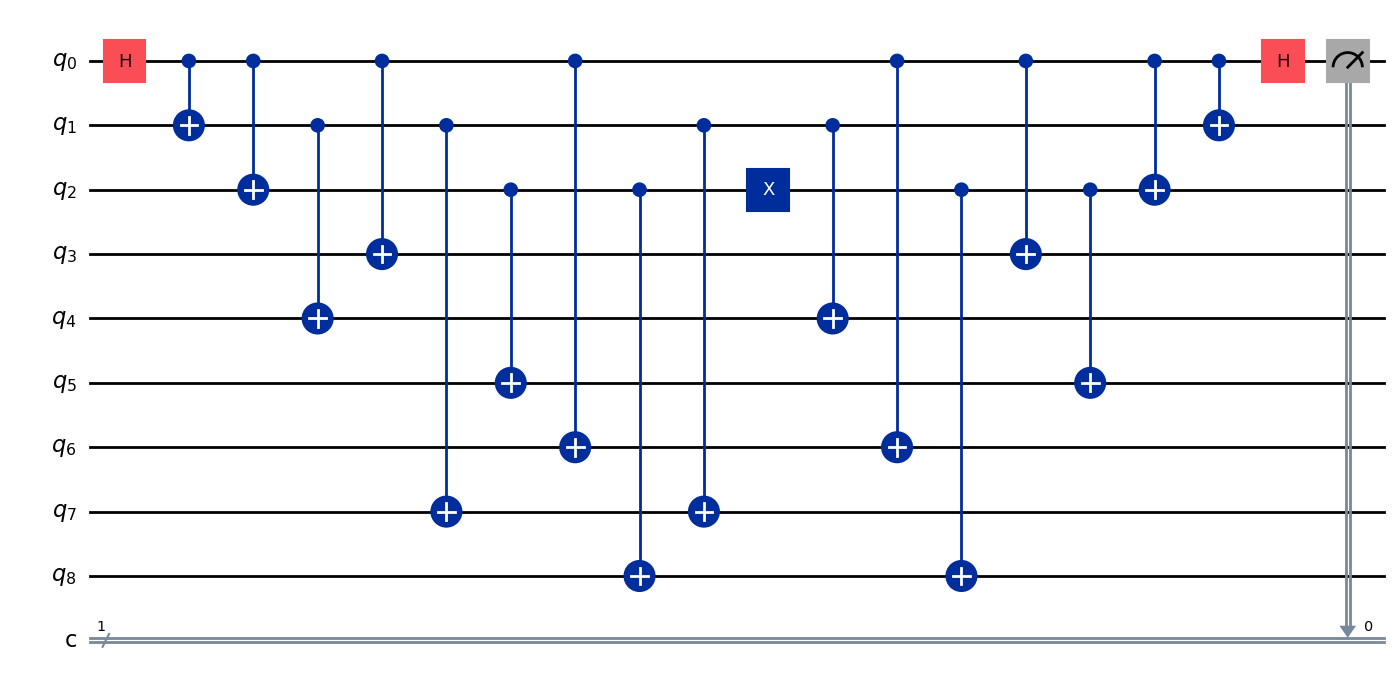

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from shor_code.shor9_quantum import Shor9QuantumCode

code = Shor9QuantumCode()
qc = code.build_encode_error_decode_circuit(
    logical_state="0",
    error_qubit=2,
    error_pauli="X",
)
qc.draw("mpl")
